<a href="https://www.kaggle.com/code/bradleypost/impact-of-land-use-regulation-on-real-estate-value?scriptVersionId=222067796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wharton-land-use-regulation-index/Land Use Regulation Analysis.csv


I read the **Stata** file in Python, downloaded it from the [Wharton Land Use Survey site](http://https://real-faculty.wharton.upenn.edu/gyourko/land-use-survey/), exported it as a CSV, then added the necessary ZORI/ZHVI data in Excel.

In [2]:
df = pd.read_csv('/kaggle/input/wharton-land-use-regulation-index/Land Use Regulation Analysis.csv')
df.head()

,Size_Rank,City,City_State,Metro,County,State,Date,Home_Value,ZORI,Jan_2020_Land_Use_Reg_Index
0,292,Coral Springs,"Coral Springs, FL","Miami-Fort Lauderdale-Pompano Beach, FL",Broward County,FL,1/1/2000,209663.09,NaN,72.25
1,292,Coral Springs,"Coral Springs, FL","Miami-Fort Lauderdale-Pompano Beach, FL",Broward County,FL,2/1/2000,210045.53,NaN,72.25
2,292,Coral Springs,"Coral Springs, FL","Miami-Fort Lauderdale-Pompano Beach, FL",Broward County,FL,3/1/2000,210579.20,NaN,72.25
3,292,Coral Springs,"Coral Springs, FL","Miami-Fort Lauderdale-Pompano Beach, FL",Broward County,FL,4/1/2000,210466.34,NaN,72.25
4,292,Coral Springs,"Coral Springs, FL","Miami-Fort Lauderdale-Pompano Beach, FL",Broward County,FL,5/1/2000,211702.24,NaN,72.25


In [3]:
#Filter the dataframe
df['Date'] = pd.to_datetime(df['Date'])
filtered_df = df[df['Date'] == '2024-11-01'] #filtered for this month
filtered_df = filtered_df.sort_values(by='ZORI', ascending=False)
filtered_df.head()

,Size_Rank,City,City_State,Metro,County,State,Date,Home_Value,ZORI,Jan_2020_Land_Use_Reg_Index
922710,3348,East Hampton,"East Hampton, NY","New York-Newark-Jersey City, NY-NJ-PA",Suffolk County,NY,2024-11-01,1970300.36,38166.203700,NaN
994388,3736,Malibu,"Malibu, CA","Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,CA,2024-11-01,3179062.41,12692.416670,NaN
750301,2416,Isla Vista,"Isla Vista, CA","Santa Maria-Santa Barbara, CA",Santa Barbara County,CA,2024-11-01,1470833.44,8558.727273,NaN
632819,1798,Los Altos,"Los Altos, CA","San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,CA,2024-11-01,4179166.70,6922.305556,NaN
874790,3083,La Canada Flintridge,"La Canada Flintridge, CA","Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,CA,2024-11-01,2334790.36,6575.000000,NaN


Text(0.5, 1.0, 'The median rent in 11/2024 was $1860.95 (n = 2669)')

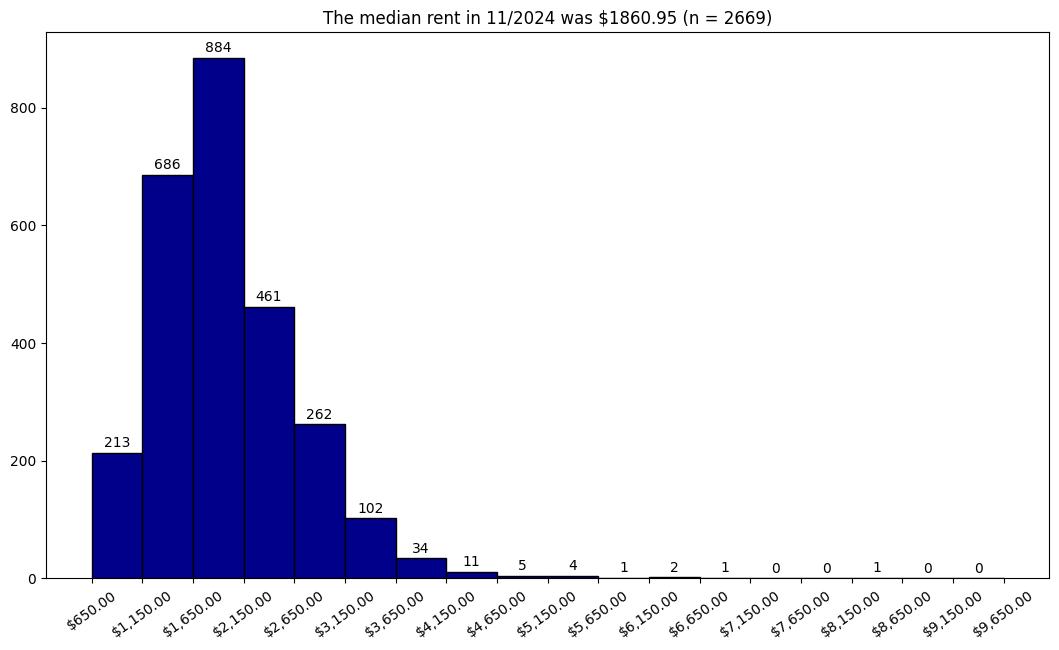

In [4]:
#What is the distribution of rent
fdf = filtered_df['ZORI'].dropna()
#Just 2 cities had rents >$10,000 in 11/2024: Malibu, CA and East Hampton, NY
ax = fdf.hist(edgecolor='black', color='darkblue', bins=
             np.arange(650, 10000, 500),figsize=(11,6))
median = round(np.median(fdf),2)
length = len(fdf)

dollar_format = ticker.StrMethodFormatter('${x:,.2f}')
ax.xaxis.set_major_formatter(dollar_format)

for patch in ax.patches: #get the length of every row in the histogram
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2, 
        height+10,
        int(height),
        ha='center',fontsize=10
        )
plt.tight_layout()
plt.grid(False) 
plt.xticks(np.arange(650, 10000, 500),rotation=35)
plt.title(f"The median rent in 11/2024 was ${median} (n = {length})")


Text(0.5, 1.0, 'The median home value in 11/2024 was $358130.36 (n = 3871).')

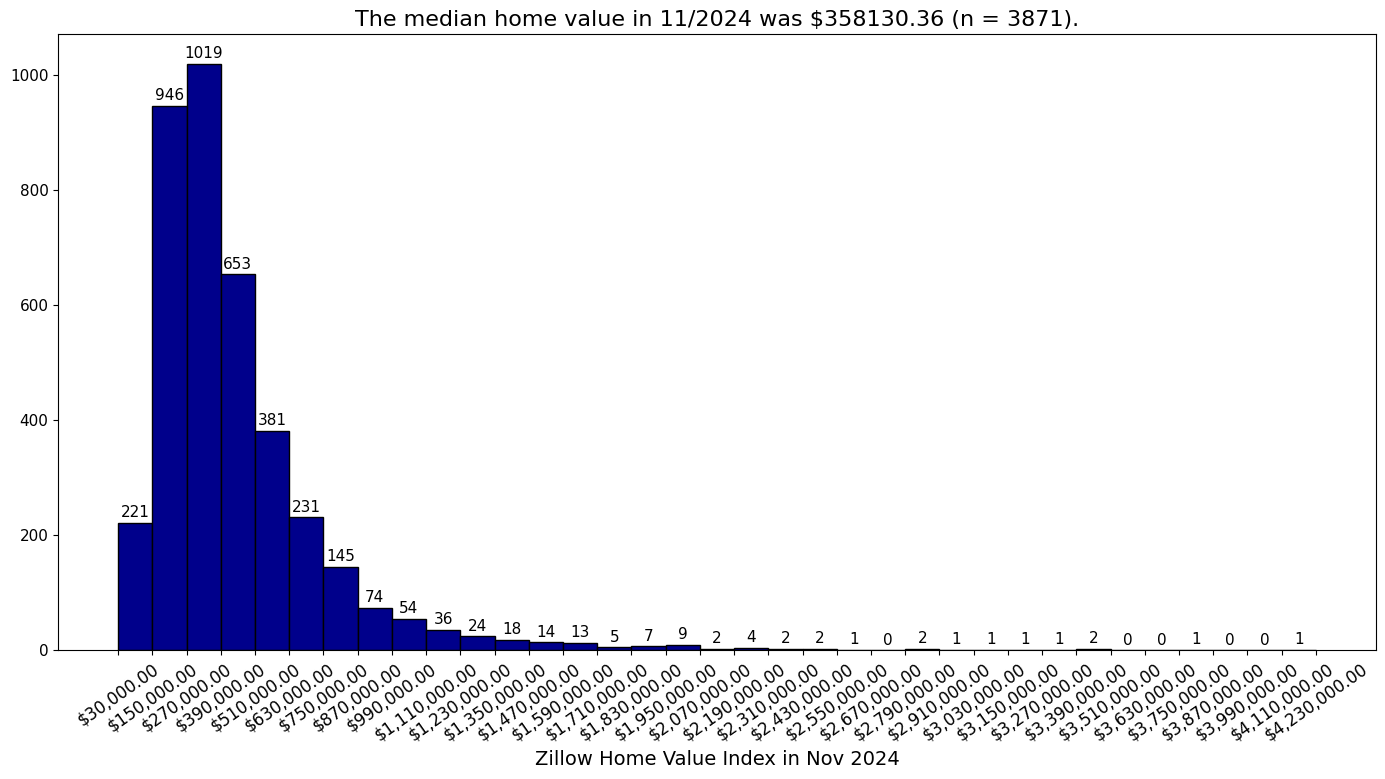

In [5]:
fdf = filtered_df['Home_Value'].dropna()
ax = fdf.hist(bins=np.arange(30000,4300000, 120000), edgecolor='black',color='darkblue',figsize=
             (17,8))
median = round(np.median(fdf),2)
length = len(fdf)


for patch in ax.patches: #get the length of every row in the histogram
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2, 
        height+10,
        int(height),
        ha='center',fontsize=11
        )
plt.ticklabel_format(style='plain',axis='both')
ax.xaxis.set_major_formatter(dollar_format)
plt.xticks(np.arange(30000,4300000, 120000),rotation=35, fontsize=12)
plt.yticks(fontsize=11)
plt.xlabel('Zillow Home Value Index in Nov 2024', fontsize=14)
plt.grid(False)
plt.title(f"The median home value in 11/2024 was ${median} (n = {length}).", fontsize=16)


Text(0, 0.5, 'Zillow Home Value Index in Nov 2024')

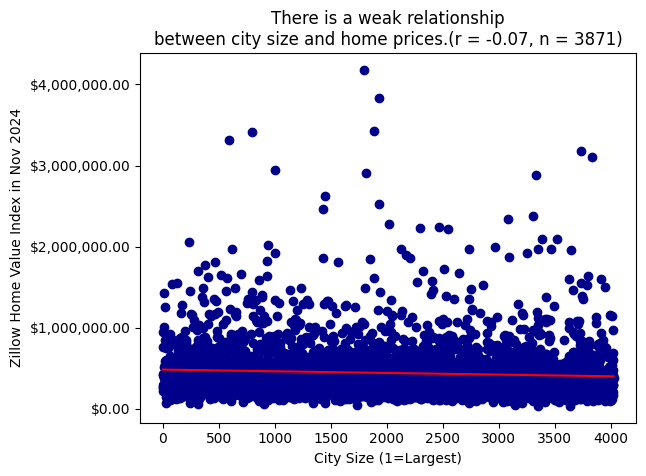

In [6]:
#Does city size play a role in home values?
filtered_data = filtered_df[['Size_Rank', 'Home_Value']].dropna() 
length = len(filtered_data)
x = filtered_data['Size_Rank']
y = filtered_data['Home_Value'] 

#remove 1st row from x to align (adjust x to match the length of y)

# Ensure x and y are aligned
assert len(x) == len(y), "x and y lengths are not aligned"

correlation = round(np.corrcoef(x,y)[0,1],2)
ax = plt.gca()
ax.yaxis.set_major_formatter(dollar_format)
plt.scatter(x,y,color='darkblue')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='r')

plt.title(f"""There is a weak relationship
between city size and home prices.(r = {correlation}, n = {length})""")
plt.xlabel("City Size (1=Largest)")
plt.ylabel("Zillow Home Value Index in Nov 2024")

Text(0, 0.5, 'Wharton Land Use Regulation Index in Jan 2020')

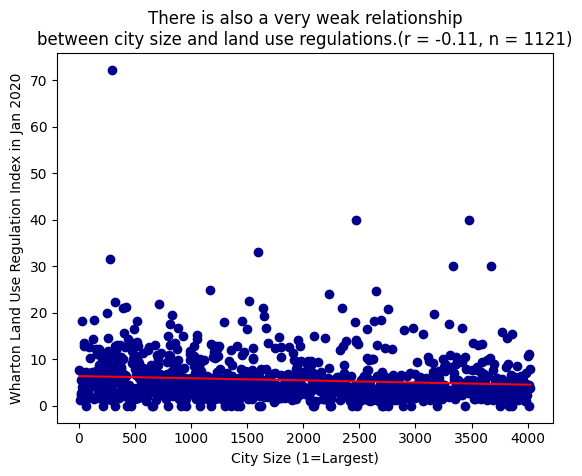

In [7]:
#Does city size influence the intensity of land use regulations?
filtered_data = filtered_df[['Size_Rank', 'Jan_2020_Land_Use_Reg_Index']].dropna() 
length = len(filtered_data)
x = filtered_data['Size_Rank']
y = filtered_data['Jan_2020_Land_Use_Reg_Index'] 

#remove 1st row from x to align (adjust x to match the length of y)

# Ensure x and y are aligned
assert len(x) == len(y), "x and y lengths are not aligned"

correlation = round(np.corrcoef(x,y)[0,1],2)
ax = plt.gca()
plt.scatter(x,y, color='darkblue')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='r')

plt.title(f"""There is also a very weak relationship
between city size and land use regulations.(r = {correlation}, n = {length})""")
plt.xlabel("City Size (1=Largest)")
plt.ylabel("Wharton Land Use Regulation Index in Jan 2020")

Text(83.34722222222221, 0.5, 'Number of municipalities')

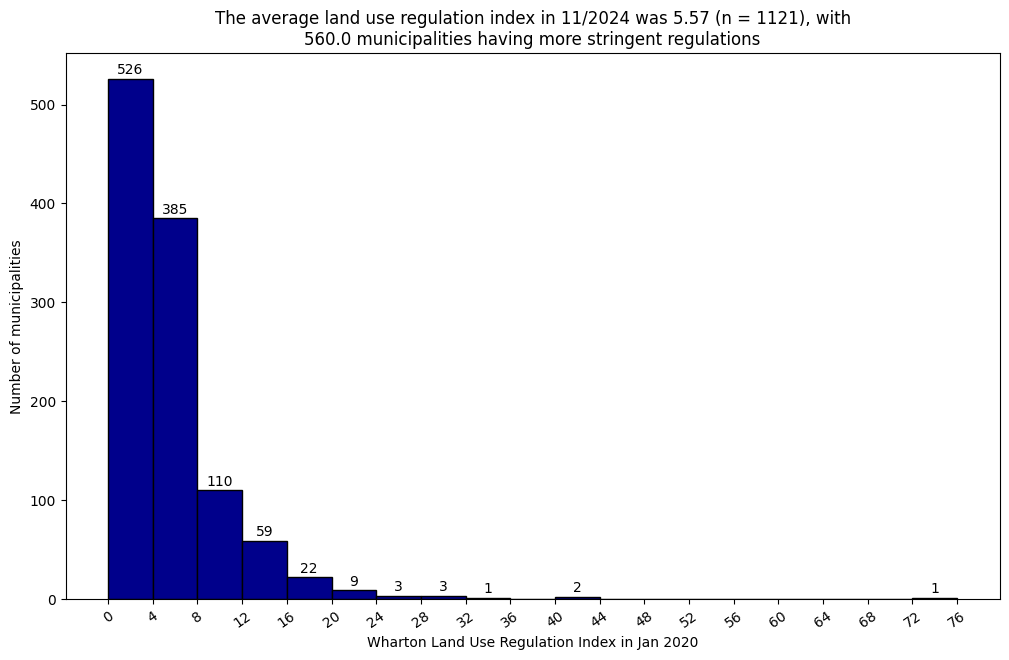

In [8]:
#What is the distribution of land use regulation indices?
fdf = filtered_df['Jan_2020_Land_Use_Reg_Index'].dropna()
ax = fdf.hist(edgecolor='black', bins=np.arange(min(fdf), max(fdf)+4, 4), color='darkblue', 
              figsize=(10,6))
average = round(np.mean(fdf),2)
length = int(len(fdf))

for patch in ax.patches: #get the length of every row in the histogram
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2, 
            height + 5,
            int(height),
            ha='center',fontsize=10
        )

plt.tight_layout()
plt.grid(False) 
plt.xticks(np.arange(min(fdf), max(fdf)+4, 4),rotation=35)
plt.title(f"""The average land use regulation index in 11/2024 was {average} (n = {length}), with
{round((length/2),0)} municipalities having more stringent regulations""")
plt.xlabel('Wharton Land Use Regulation Index in Jan 2020')
plt.ylabel('Number of municipalities')

Text(58.847222222222214, 0.5, 'Zillow Home Value Index in Nov 2024')

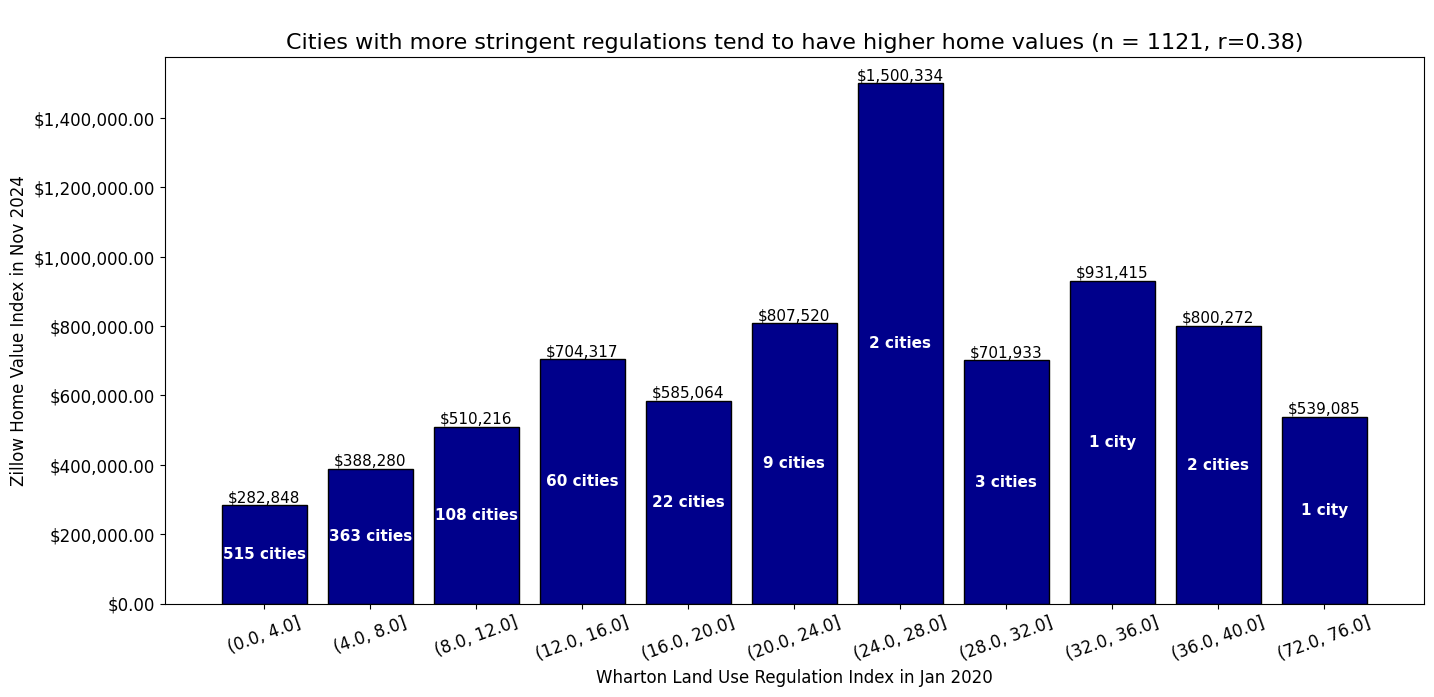

In [9]:
filtered_data = filtered_df[['Jan_2020_Land_Use_Reg_Index','Home_Value']].dropna()

x = filtered_data['Jan_2020_Land_Use_Reg_Index'] 
y = filtered_data['Home_Value']
correlation = round(np.corrcoef(x,y)[0,1], 2)
length = len(x)

bins = pd.cut(x, np.arange(min(x), max(x)+4, 4))
grouped_data = filtered_data.groupby(bins,observed=True)['Home_Value'].median()
city_counts = filtered_data.groupby(bins,observed=True)['Home_Value'].count()
fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(grouped_data.index.astype(str), grouped_data,edgecolor='black',color='darkblue')
ax.yaxis.set_major_formatter(dollar_format)

for bar, value, count in zip(bars, grouped_data, city_counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        bar.get_height() + 1000,                  # Y-coordinate: above the top of the bar
        f"${value:,.0f}",                  # Text: formatted value
        ha='center', va='bottom', fontsize=11, color='black'
    )

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2, 
        f"{count} {'city' if count == 1 else 'cities'}",
        ha='center', va='center', fontsize=11, color='white', fontweight='bold'        
    )

plt.tight_layout()
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"""
Cities with more stringent regulations tend to have higher home values (n = {length}, r={correlation})""", fontsize=16)
plt.xlabel('Wharton Land Use Regulation Index in Jan 2020', fontsize=12)
plt.ylabel('Zillow Home Value Index in Nov 2024', fontsize=12)

Text(64.47222222222221, 0.5, 'Zillow Observed Rent Index in Nov 2024')

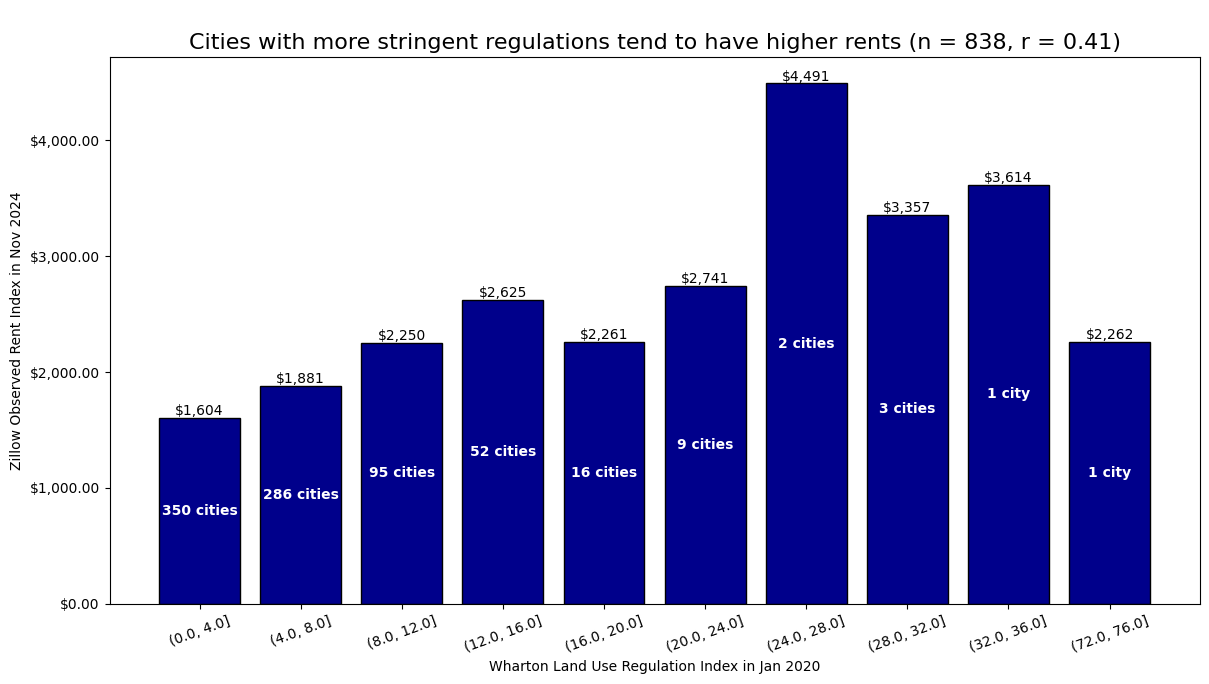

In [10]:
filtered_data = filtered_df[['Jan_2020_Land_Use_Reg_Index','ZORI']].dropna()

x = filtered_data['Jan_2020_Land_Use_Reg_Index'] 
y = filtered_data['ZORI']
correlation = round(np.corrcoef(x,y)[0,1], 2)
length = len(y)

bins = pd.cut(x, np.arange(min(x), max(x)+4, 4))
grouped_data = filtered_data.groupby(bins,observed=True)['ZORI'].median()
city_counts = filtered_data.groupby(bins,observed=True)['ZORI'].count()

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(grouped_data.index.astype(str), grouped_data, edgecolor='black', color='darkblue')
ax.yaxis.set_major_formatter(dollar_format)

for bar, value, count in zip(bars, grouped_data, city_counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        bar.get_height(),                  # Y-coordinate: top of the bar
        f"${value:,.0f}",                  # Text: formatted value
        ha='center', va='bottom', fontsize=10, color='black'
    )
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2, 
        f"{count} {'city' if count == 1 else 'cities'}",
        ha='center', va='center', fontsize=10, color='white', fontweight='bold'        
        )
    

plt.tight_layout()
plt.xticks(rotation=20)
plt.title(f"""
Cities with more stringent regulations tend to have higher rents (n = {length}, r = {correlation})""",
         fontsize=16)
plt.xlabel('Wharton Land Use Regulation Index in Jan 2020')
plt.ylabel('Zillow Observed Rent Index in Nov 2024')


In [11]:
#Find the cumulative % change in home values since 1/1/2000
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Cum_ZHVI_Chng'] = df.groupby('City_State')['Home_Value'].apply(
    lambda x:x.pct_change(fill_method=None).cumsum()).reset_index(level=0, drop=True)
df[['City_State','Date','Home_Value','Cum_ZHVI_Chng']].head()

,City_State,Date,Home_Value,Cum_ZHVI_Chng
0,"Coral Springs, FL",2000-01-01,209663.09,NaN
760230,"Inkster, MI",2000-01-01,51312.69,NaN
444768,"Yorba Linda, CA",2000-01-01,570947.12,NaN
43933,"National City, CA",2000-01-01,225664.19,NaN
444470,"Corvallis, OR",2000-01-01,297832.97,NaN


In [12]:
#Find the cumulative % change in rents since 1/1/2015
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['Cum_ZORI_Chng'] = df.groupby('City_State')['ZORI'].apply(
    lambda x:x.pct_change(fill_method=None).cumsum()).reset_index(level=0, drop=True)
df[['City_State','Date','ZORI','Cum_ZORI_Chng']].head()


,City_State,Date,ZORI,Cum_ZORI_Chng
0,"Coral Springs, FL",2000-01-01,NaN,NaN
914376,"Bluefield, WV",2000-01-01,NaN,NaN
326397,"Fort Myers, FL",2000-01-01,NaN,NaN
579436,"Lincolnton, NC",2000-01-01,NaN,NaN
588898,"Buffalo Grove, IL",2000-01-01,NaN,NaN


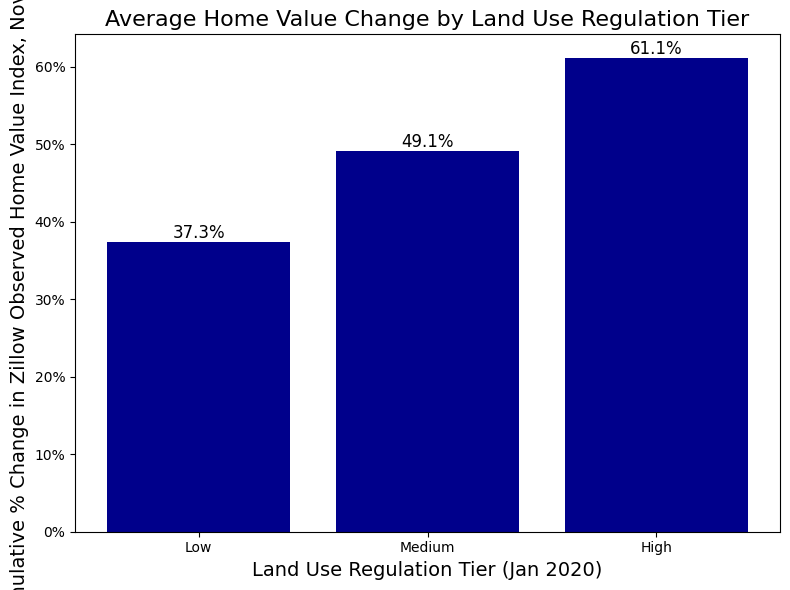

In [13]:
x = df['Jan_2020_Land_Use_Reg_Index'].dropna()
median = np.median(x)
upper_qtrle = np.percentile(x, 75)
bins = [df['Jan_2020_Land_Use_Reg_Index'].min(),median, upper_qtrle, df['Jan_2020_Land_Use_Reg_Index'].max()]
labels = ['Low', 'Medium', 'High']

df = df[df['Date'] == '11/1/2024']
df['Land_Use_Tier'] = pd.cut(df['Jan_2020_Land_Use_Reg_Index'], bins=bins, labels=labels, include_lowest=True)

# 2. Group by 'Land_Use_Tier' and calculate the average 'Cum_ZHVI_Chng' for each tier
avg_change_by_tier = df.groupby('Land_Use_Tier',observed=True)['Cum_ZHVI_Chng'].mean().reset_index()

# 3. Plot the result
fig, ax = plt.subplots(figsize=(8, 6))
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Bar plot of the average home value change by land use regulation tier
bars = ax.bar(avg_change_by_tier['Land_Use_Tier'], avg_change_by_tier['Cum_ZHVI_Chng'], color='darkblue')

# Add text annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1%}', 
            ha='center', va='bottom', fontsize=12)

# Set labels, title, and formatting
ax.set_xlabel('Land Use Regulation Tier (Jan 2020)', fontsize=14)
ax.set_ylabel('Cumulative % Change in Zillow Observed Home Value Index, Nov 2024', fontsize=14)
plt.title(f"Average Home Value Change by Land Use Regulation Tier", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

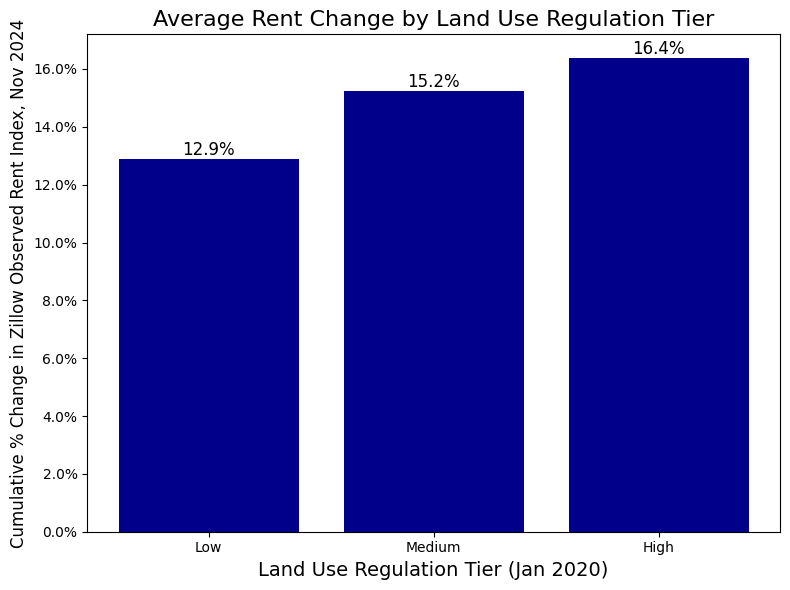

In [14]:
x = df['Jan_2020_Land_Use_Reg_Index'].dropna()
median = np.median(x)
upper_qtrle = np.percentile(x, 75)
bins = [df['Jan_2020_Land_Use_Reg_Index'].min(),median, upper_qtrle, df['Jan_2020_Land_Use_Reg_Index'].max()]
labels = ['Low', 'Medium', 'High']

df = df[df['Date'] == '11/1/2024']
df['Land_Use_Tier'] = pd.cut(df['Jan_2020_Land_Use_Reg_Index'], bins=bins, labels=labels, include_lowest=True)

# 2. Group by 'Land_Use_Tier' and calculate the average 'Cum_ZORI_Chng' for each tier
avg_change_by_tier = df.groupby('Land_Use_Tier',observed=True)['Cum_ZORI_Chng'].mean().reset_index()

# 3. Plot the result
fig, ax = plt.subplots(figsize=(8, 6))
ax.yaxis.set_major_formatter(PercentFormatter(1))

# Bar plot of the average rent change by land use regulation tier
bars = ax.bar(avg_change_by_tier['Land_Use_Tier'], avg_change_by_tier['Cum_ZORI_Chng'], color='darkblue')

# Add text annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1%}', 
            ha='center', va='bottom', fontsize=12)

# Set labels, title, and formatting
ax.set_xlabel('Land Use Regulation Tier (Jan 2020)', fontsize=14)
ax.set_ylabel('Cumulative % Change in Zillow Observed Rent Index, Nov 2024', fontsize=12)
plt.title(f"Average Rent Change by Land Use Regulation Tier", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

Based on the results of this analysis, it's clear that there's a significant relationship between housing affordability and less strict land regulation. Ideally, zoning and land use decisions should be made at the state level to minimize local opposition to new development. Modular construction should be permitted to expedite the addition of new supply to communities. 